In [2]:
# from sklearn import svm,metrics
from sklearn.neighbors import KNeighborsClassifier      # 분류
from sklearn.neighbors import KNeighborsRegressor       # 회귀 예측
from sklearn.linear_model import LinearRegression       # 선형 회귀
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import requests
import random
import glob,os.path,re
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['font.size'] = 10
matplotlib.rcParams['axes.unicode_minus']=False

In [3]:
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0])

perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0])

In [4]:
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight,random_state=42)
train_input = np.array(train_input).reshape(-1,1)
test_input = np.array(test_input).reshape(-1,1)

## 다항회귀

In [5]:
# 특성, 제곱을 자동으로 만들어주는 라이브러리
from sklearn.preprocessing import PolynomialFeatures

In [6]:
# 수동으로 직접 제곱
# 2차로 전처리 완료
train_poly = np.column_stack((train_input**2,train_input))
test_poly = np.column_stack((test_input**2,test_input))

In [7]:
train_input
train_poly

array([[ 384.16,   19.6 ],
       [ 484.  ,   22.  ],
       [ 349.69,   18.7 ],
       [ 302.76,   17.4 ],
       [1296.  ,   36.  ],
       [ 625.  ,   25.  ],
       [1600.  ,   40.  ],
       [1521.  ,   39.  ],
       [1849.  ,   43.  ],
       [ 484.  ,   22.  ],
       [ 400.  ,   20.  ],
       [ 484.  ,   22.  ],
       [ 576.  ,   24.  ],
       [ 756.25,   27.5 ],
       [1849.  ,   43.  ],
       [1600.  ,   40.  ],
       [ 576.  ,   24.  ],
       [ 441.  ,   21.  ],
       [ 756.25,   27.5 ],
       [1600.  ,   40.  ],
       [1075.84,   32.8 ],
       [ 702.25,   26.5 ],
       [1332.25,   36.5 ],
       [ 187.69,   13.7 ],
       [ 515.29,   22.7 ],
       [ 225.  ,   15.  ],
       [1369.  ,   37.  ],
       [1225.  ,   35.  ],
       [ 823.69,   28.7 ],
       [ 552.25,   23.5 ],
       [1521.  ,   39.  ],
       [ 441.  ,   21.  ],
       [ 529.  ,   23.  ],
       [ 484.  ,   22.  ],
       [1936.  ,   44.  ],
       [ 506.25,   22.5 ],
       [ 361.  ,   19.  ],
 

In [8]:
lr = LinearRegression()
lr.fit(train_poly,train_target)


lr.predict(test_poly)
lr.score(test_poly,test_target)

0.9775935108325122

In [9]:
# 50cm 예측값 >>  knr = 1033 / lr 1차 = 1241 / lr 다항 = 1500
lr.predict([[50**2,50]])        # 1573

array([1573.98423528])

In [10]:

lr.coef_[0]
lr.intercept_

116.0502107827827

(42,)

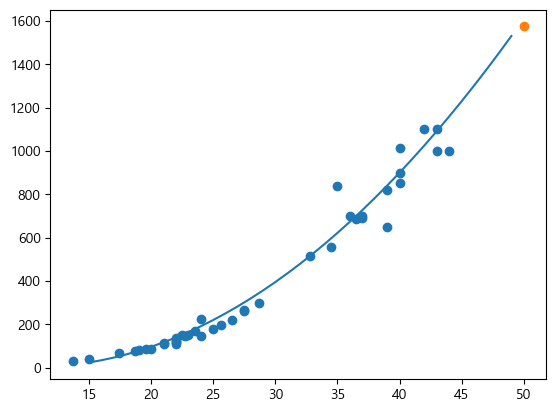

In [13]:
# 선형회귀 - 15, 50의 값으로 선을 그었음.
# 다항회귀 - 직선을 여러번 그리기
plt.scatter(train_input,train_target)
x = np.arange(15,50)
plt.plot(x,(lr.coef_[0]*x)**2 + (lr.coef_[1]*x) + lr.intercept_)  # (기울기*x**2) + (기울기*x) + (y절편)

plt.scatter(50,1574)
train_input.shape
train_target.shape

In [12]:
print(lr.score(train_poly,train_target))
print(lr.score(test_poly,test_target))

0.9706807451768623
0.9775935108325122
